# ML First Project COMP-4730

Pooja Chandrasekharan, Srivatsan Vasudevan, Ahsan Khan

In [23]:
# Importing Libraries

import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.applications import vgg16
from tensorflow.keras.datasets import mnist
import wandb
from wandb.keras import WandbCallback

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)


##### Loading Data

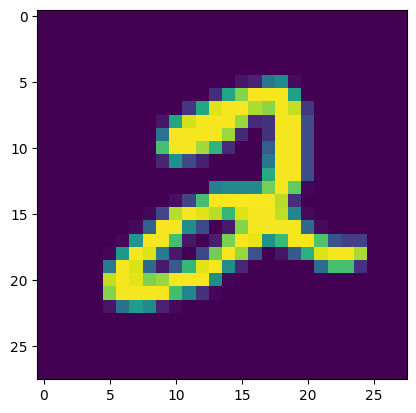

In [24]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
plt.imshow(train_X[5])

###### Normalising and Preparing Data

In [25]:
train_X = train_X/255
test_X = test_X/255
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)
train_X.shape

(60000, 28, 28, 1)

### Base CNN Model

In [26]:
#Simple CNN Model
wandb.init(
    project = 'Topics in AI Report 1',
    name = 'Plain CNN Model'
)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=train_X,y=train_y, validation_data=(test_X, test_y),epochs=10, callbacks=[WandbCallback()])

accuracy,▁
epoch,▁
loss,▁
val_accuracy,▁
val_loss,▁
accuracy,0.10263
best_epoch,0
best_val_loss,2.53
epoch,0
loss,2.53212
val_accuracy,0.1018


Epoch 1/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.1876 - accuracy: 0.9438

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1874 - accuracy: 0.9439 - val_loss: 0.0963 - val_accuracy: 0.9716
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0728 - accuracy: 0.9782

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 5ms/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.0604 - val_accuracy: 0.9806
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0480 - accuracy: 0.9849

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0603 - val_accuracy: 0.9812
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0334 - accuracy: 0.9891

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221642-3pvftl3p/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0534 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0601 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0562 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0585 - val_accuracy: 0.9847
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0565 - val_accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 0.0643 - val_accuracy: 0.9853
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0697 - val_accuracy: 0.9845


### First Experiment - Deeper CNN

In [27]:
#Experiment 1 Deeper CNN
wandb.init(
    project = 'Topics in AI Report 1',
    name = 'Deeper CNN Model'
)
model2 = Sequential()
model2.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model2.add(Conv2D(64, kernel_size=(3,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model2.add(Dense(128, activation=tf.nn.relu))
model2.add(Dropout(0.1))
model2.add(Dense(10,activation=tf.nn.softmax))
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model2.fit(x=train_X,y=train_y, validation_data=(test_X, test_y),epochs=10, callbacks=[WandbCallback()])

accuracy,▁▆▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▆▇▆▇▇██▇
val_loss,█▂▂▁▂▁▂▁▃▄
accuracy,0.99645
best_epoch,3
best_val_loss,0.05345
epoch,9
loss,0.01066
val_accuracy,0.9845


Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.1220 - accuracy: 0.9624

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 45s 24ms/step - loss: 0.1219 - accuracy: 0.9624 - val_loss: 0.0465 - val_accuracy: 0.9864
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0507 - accuracy: 0.9849

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 23ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0405 - accuracy: 0.9876

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_221826-e5m3fhry/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 23ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0392 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0491 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0496 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0531 - val_accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0252 - accuracy: 0.9925 - val_loss: 0.0533 - val_accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0670 - val_accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0237 - accuracy: 0.9935 - val_loss: 0.0698 - val_accura

### Experiment 2 - Increased Droput

In [28]:
#Experiment 2 Increased Dropoout
wandb.init(
    project = 'Topics in AI Report 1',
    name = 'Deeper CNN Model with higher dropouts'
)
model3 = Sequential()
model3.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model3.add(Conv2D(64, kernel_size=(3,3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3,3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model3.add(Dense(128, activation=tf.nn.relu))
model3.add(Dropout(0.6))
model3.add(Dense(10,activation=tf.nn.softmax))
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model3.fit(x=train_X,y=train_y, validation_data=(test_X, test_y),epochs=10, callbacks=[WandbCallback()])

accuracy,▁▆▆▇▇█▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▁▁▁▁▁
val_accuracy,▂▂█▃▁▃▄▆▁▄
val_loss,▃▂▁▃▃▄▄▇▇█
accuracy,0.99493
best_epoch,2
best_val_loss,0.03921
epoch,9
loss,0.01825
val_accuracy,0.9873


Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.2283 - accuracy: 0.9311

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 23ms/step - loss: 0.2283 - accuracy: 0.9311 - val_loss: 0.0577 - val_accuracy: 0.9826
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.1134 - accuracy: 0.9669

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 45s 24ms/step - loss: 0.1134 - accuracy: 0.9669 - val_loss: 0.0407 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0976 - accuracy: 0.9714 - val_loss: 0.0504 - val_accuracy: 0.9847
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0852 - accuracy: 0.9756

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 24ms/step - loss: 0.0853 - accuracy: 0.9756 - val_loss: 0.0378 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0773 - accuracy: 0.9769 - val_loss: 0.0465 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0609 - accuracy: 0.9818 - val_loss: 0.0403 - val_accuracy: 0.9895
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0596 - accuracy: 0.9822

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 43s 23ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0358 - val_accuracy: 0.9891
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9828

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_222559-w46kd0qj/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 23ms/step - loss: 0.0573 - accuracy: 0.9828 - val_loss: 0.0358 - val_accuracy: 0.9908


### Experiment 3 - Adding Batch Normalization Layers

In [29]:
#Experiment 3 Adding Batch Normlization layers
wandb.init(
    project = 'Topics in AI Report 1',
    name = 'Deeper CNN Model with Batch Normalization'
)
model4 = Sequential()
model4.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(BatchNormalization())
model4.add(Conv2D(64, kernel_size=(3,3)))
model.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model4.add(Conv2D(128, kernel_size=(3,3)))
model.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model4.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model4.add(Dense(128, activation=tf.nn.relu))
model.add(BatchNormalization())
model4.add(Dropout(0.6))
model4.add(Dense(10,activation=tf.nn.softmax))
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model4.fit(x=train_X,y=train_y, validation_data=(test_X, test_y),epochs=10, callbacks=[WandbCallback()])

accuracy,▁▆▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▂▁▁▁▁
val_accuracy,▁▄▃▅▄▄▅▇▇█
val_loss,█▃▆▂▄▅▃▂▁▁
accuracy,0.98278
best_epoch,9
best_val_loss,0.0358
epoch,9
loss,0.05728
val_accuracy,0.9908


Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2159 - accuracy: 0.9342

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 23ms/step - loss: 0.2159 - accuracy: 0.9342 - val_loss: 0.0539 - val_accuracy: 0.9830
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.1147 - accuracy: 0.9660

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 23ms/step - loss: 0.1147 - accuracy: 0.9661 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0946 - accuracy: 0.9717 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0826 - accuracy: 0.9756 - val_loss: 0.0435 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0738 - accuracy: 0.9777 - val_loss: 0.0387 - val_accuracy: 0.9885
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9785

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 44s 23ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0386 - val_accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0583 - accuracy: 0.9823

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_223329-1fpu740c/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 45s 24ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0344 - val_accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0470 - val_accuracy: 0.9876


### Experiment 4 - Comparision with Mobilenet (Existing Architecture)

In [30]:
import tensorflow as tf
wandb.init(
    project = 'Topics in AI Report 1',
    name = 'Mobile Net for comparision'
)
mnet_model = tf.keras.applications.mobilenet.MobileNet(include_top=False, input_tensor=Input(shape=(128, 128, 3)))
mnet_model.summary()
(trainVGG_X, trainVGG_y), (testVGG_X, testVGG_y) = mnist.load_data()
print(trainVGG_X.shape, testVGG_X.shape)
trainVGG_X.resize((60000, 128, 128, 3))
testVGG_X.resize(10000, 128, 128, 3)
mnet_model.summary()
pretrained_model = Sequential()
for layer in mnet_model.layers:
    pretrained_model.add(layer)
pretrained_model.summary()
for layer in mnet_model.layers:
    layer.trainable = False
pretrained_model.add(Flatten())
pretrained_model.add(Dense(10,activation=tf.nn.softmax))
pretrained_model.summary()
type(pretrained_model)
pretrained_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
pretrained_model.fit(x=trainVGG_X,y=trainVGG_y, validation_data=(testVGG_X, testVGG_y),epochs=10, callbacks=[WandbCallback()])

accuracy,▁▆▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
val_accuracy,▁▆▅▄▆▇▆▄█▅
val_loss,█▂▂▄▃▂▂▅▁▆
accuracy,0.98338
best_epoch,8
best_val_loss,0.03441
epoch,9
loss,0.05528
val_accuracy,0.9876


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 8, 8, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_9

 ation)                                                          
                                                                 
 conv_pw_2_relu (ReLU)       (None, 32, 32, 128)       0         
                                                                 
 conv_dw_3 (DepthwiseConv2D)  (None, 32, 32, 128)      1152      
                                                                 
 conv_dw_3_bn (BatchNormaliz  (None, 32, 32, 128)      512       
 ation)                                                          
                                                                 
 conv_dw_3_relu (ReLU)       (None, 32, 32, 128)       0         
                                                                 
 conv_pw_3 (Conv2D)          (None, 32, 32, 128)       16384     
                                                                 
 conv_pw_3_bn (BatchNormaliz  (None, 32, 32, 128)      512       
 ation)                                                          
          

 zation)                                                         
                                                                 
 conv_dw_11_relu (ReLU)      (None, 8, 8, 512)         0         
                                                                 
 conv_pw_11 (Conv2D)         (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_11_bn (BatchNormali  (None, 8, 8, 512)        2048      
 zation)                                                         
                                                                 
 conv_pw_11_relu (ReLU)      (None, 8, 8, 512)         0         
                                                                 
 conv_pad_12 (ZeroPadding2D)  (None, 9, 9, 512)        0         
                                                                 
 conv_dw_12 (DepthwiseConv2D  (None, 4, 4, 512)        4608      
 )                                                               
          

                                                                 
 conv_pw_5_bn (BatchNormaliz  (None, 16, 16, 256)      1024      
 ation)                                                          
                                                                 
 conv_pw_5_relu (ReLU)       (None, 16, 16, 256)       0         
                                                                 
 conv_pad_6 (ZeroPadding2D)  (None, 17, 17, 256)       0         
                                                                 
 conv_dw_6 (DepthwiseConv2D)  (None, 8, 8, 256)        2304      
                                                                 
 conv_dw_6_bn (BatchNormaliz  (None, 8, 8, 256)        1024      
 ation)                                                          
                                                                 
 conv_dw_6_relu (ReLU)       (None, 8, 8, 256)         0         
                                                                 
 conv_pw_6

                                                                 
Total params: 3,228,864
Trainable params: 3,206,976
Non-trainable params: 21,888
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 6

                                                                 
 conv_pw_8 (Conv2D)          (None, 8, 8, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 8, 8, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 8, 8, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 8, 8, 512)         0         
                                                                 
 conv_pw_9

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 202s 107ms/step - loss: 2.5231 - accuracy: 0.0999 - val_loss: 2.5434 - val_accuracy: 0.0892
Epoch 2/10
1875/1875 [==============================] - 199s 106ms/step - loss: 2.4622 - accuracy: 0.1042 - val_loss: 2.6461 - val_accuracy: 0.0981
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 2.4253 - accuracy: 0.1035

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 199s 106ms/step - loss: 2.4253 - accuracy: 0.1035 - val_loss: 2.5416 - val_accuracy: 0.1040
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 2.3990 - accuracy: 0.1064

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 200s 107ms/step - loss: 2.3990 - accuracy: 0.1064 - val_loss: 2.5101 - val_accuracy: 0.0979
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 2.3742 - accuracy: 0.1108

INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best/assets
wandb: Adding directory to artifact (/Users/srivatsan/Desktop/windsor/topics_in_ai/ml-course-first-project/wandb/run-20221017_224100-30gf8tw6/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 197s 105ms/step - loss: 2.3742 - accuracy: 0.1108 - val_loss: 2.5097 - val_accuracy: 0.0964
Epoch 6/10
1875/1875 [==============================] - 194s 104ms/step - loss: 2.3740 - accuracy: 0.1085 - val_loss: 2.6642 - val_accuracy: 0.1014
Epoch 7/10
1875/1875 [==============================] - 190s 101ms/step - loss: 2.3518 - accuracy: 0.1119 - val_loss: 2.6014 - val_accuracy: 0.1003
Epoch 8/10
1875/1875 [==============================] - 188s 100ms/step - loss: 2.3527 - accuracy: 0.1126 - val_loss: 2.6467 - val_accuracy: 0.0891
Epoch 9/10
1875/1875 [==============================] - 186s 99ms/step - loss: 2.3499 - accuracy: 0.1108 - val_loss: 2.6100 - val_accuracy: 0.1033
Epoch 10/10
1875/1875 [==============================] - 187s 100ms/step - loss: 2.3419 - accuracy: 0.1132 - val_loss: 2.7051 - val_accuracy: 0.0985
